In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
exist_light = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/existing_lightings.csv")
exist_fixture = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/existing_fixtures_c.csv")
operating_schedule = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/operating_schedules.csv")
rate_schedule = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/rate_schedules.csv")
floor_plan = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/floor_plans.csv")
option_exist_fixture = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/option_existing_fixtures.csv")
option_locations = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/option_locations.csv")
areas = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/areas_c.csv")
option_calc_lighting = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/option_calc_lightings.csv")
solutions = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/solutions.csv")

In [ ]:
option_calc_fixtures = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/option_calc_fixture.csv", error_bad_lines= False)

In [ ]:
proopts = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/proposal_options.csv")

In [ ]:
projects = pd.read_csv("/content/drive/MyDrive/Data/Retrolux_EDA_Subtask/projects.csv")

# **Existing_lighting Table**

In [ ]:
exist_light.shape

(77546, 41)

In [ ]:
print("Removing null values ")
print()
for i in exist_light.columns:
    if (exist_light[i].isnull().sum()/len(exist_light))*100 >= 30:
        print(i,":", exist_light[i].isnull().sum()/len(exist_light)*100, "%")
        exist_light.drop(i, axis=1,inplace=True)

Removing null values 

description : 53.110411884558836 %
company_id : 79.5024888453305 %
existing_lighting_id : 75.07672865138112 %
technology_id : 88.55389059397002 %
product_type_id : 88.55389059397002 %
category_id : 88.87370077115519 %
subcategory_id : 93.12150207618703 %
inactive_at : 96.87282387228225 %
inactivated_by_user_id : 100.0 %
ballast_id : 96.66133649704692 %
luminaire_category_id : 91.57403347690402 %
luminaire_subcategory_id : 98.53506305934542 %
base_type_id : 99.99871044283393 %
lens_trim_id : 95.33954040182601 %
mounting_type_id : 100.0 %
product_length : 94.60320326000051 %
ballast_factor : 92.05116962834963 %
ballast_factor_name : 100.0 %
ballast_loss_factor : 100.0 %
power_factor : 99.99871044283393 %
color_temp : 100.0 %
calc_ready : 100.0 %
created_by_user_id : 31.846903773244268 %
luminaire_size_id : 94.67412890413432 %
favorite_company_id : 95.30343280117609 %
copied_from_id : 90.79127227710005 %


In [ ]:
print("Dropping columns which have mostly zero's ")
print()
for i in exist_light.columns:
    if len(exist_light[exist_light[i]==0])/len(exist_light)*100 >=85:
        print(i,":", len(exist_light[exist_light[i]==0])/len(exist_light)*100,"%")
        exist_light.drop(i, axis=1,inplace=True)

Dropping columns which have mostly zero's 



In [ ]:
exist_light.columns

Index(['id', 'name', 'project_id', 'watts_per_product', 'lm70', 'created_at',
       'updated_at', 'active', 'shown', 'custom_attributes', 'audit_complete',
       'display_order', 'uuid', 'existing_product_type', 'code'],
      dtype='object')

In [ ]:
exist_light.isnull().sum()

id                           0
name                         0
project_id               12518
watts_per_product            0
lm70                         0
created_at                   0
updated_at                   0
active                       0
shown                        0
custom_attributes            0
audit_complete           12518
display_order             8505
uuid                      8505
existing_product_type        0
code                     11990
dtype: int64

In [ ]:
exist_light = exist_light.drop(columns=['created_at', 'updated_at', 'shown', 'custom_attributes', 'audit_complete', 'display_order', 'uuid', 'code'])

In [ ]:
exist_light.shape

(77546, 7)

In [ ]:
exist_light['active'].value_counts(normalize=True)

t    0.967568
f    0.032432
Name: active, dtype: float64

3% of existing lightings being inactive

In [ ]:
df_exist_light = exist_light[exist_light.active =='t']

In [ ]:
df_exist_light.shape

(75031, 7)

In [ ]:
df_exist_light.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75031 entries, 0 to 77545
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     75031 non-null  int64  
 1   name                   75031 non-null  object 
 2   project_id             63575 non-null  float64
 3   watts_per_product      75031 non-null  float64
 4   lm70                   75031 non-null  int64  
 5   active                 75031 non-null  object 
 6   existing_product_type  75031 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 4.6+ MB


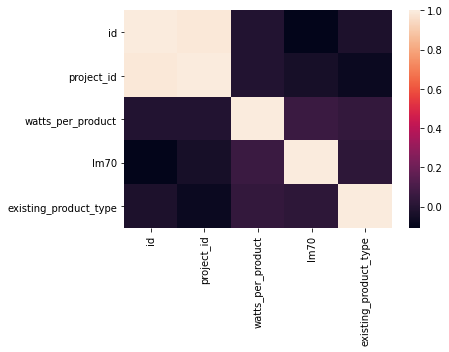

In [ ]:
sns.heatmap(df_exist_light.corr())

# **Existing_fixtures**

In [ ]:
exist_fixture.shape

(190876, 99)

In [ ]:
exist_fixture.columns

Index(['id', 'area_id', 'created_by_user_id', 'operating_schedule_id',
       'active', 'inactive_at', 'name', 'description', 'existing_count',
       'working_fixtures_count', 'existing_control', 'conditions',
       'year_installed', 'lighting_satisfaction', 'mounting_height',
       'created_at', 'updated_at', 'existing_lighting_id', 'internal_notes',
       'notes', 'add_after', 'uuid', 'custom_attributes', 'calc_ready',
       'audit_complete', 'status', 'copied_from_id', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55',
       'Unnamed: 56', 'Unnamed: 57

In [ ]:
print("Removing null values ")
print()
for i in exist_fixture.columns:
    if (exist_fixture[i].isnull().sum()/len(exist_fixture))*100 >= 30:
        print(i,":", exist_fixture[i].isnull().sum()/len(exist_fixture)*100, "%")
        exist_fixture.drop(i, axis=1,inplace=True)

Removing null values 

operating_schedule_id : 95.43630419748948 %
inactive_at : 94.15798738447998 %
name : 99.11984744022297 %
description : 89.4659360003353 %
working_fixtures_count : 99.89574383369307 %
existing_control : 98.8018399379702 %
conditions : 98.52679226303988 %
year_installed : 99.58978603910393 %
lighting_satisfaction : 99.61178985309834 %
mounting_height : 97.78599719189421 %
internal_notes : 98.12129340514261 %
notes : 96.52182568788113 %
status : 50.940924998428294 %
Unnamed: 27 : 50.99750623441397 %
Unnamed: 28 : 56.11653639011715 %
Unnamed: 29 : 54.21268257926612 %
Unnamed: 30 : 59.731972589534564 %
Unnamed: 31 : 57.90303652633123 %
Unnamed: 32 : 60.029024078459315 %
Unnamed: 33 : 60.07512730778096 %
Unnamed: 34 : 83.4688488861879 %
Unnamed: 35 : 60.59850374064838 %
Unnamed: 36 : 84.04671095370817 %
Unnamed: 37 : 83.84134202309352 %
Unnamed: 38 : 84.5040759445923 %
Unnamed: 39 : 84.41029778494939 %
Unnamed: 40 : 85.30354785305644 %
Unnamed: 41 : 84.98134914813807 %

In [ ]:
print("Dropping columns which have mostly zero's ")
print()
for i in exist_fixture.columns:
    if len(exist_fixture[exist_fixture[i]==0])/len(exist_fixture)*100 >=85:
        print(i,":", len(exist_fixture[exist_fixture[i]==0])/len(exist_fixture)*100,"%")
        exist_fixture.drop(i, axis=1,inplace=True)

Dropping columns which have mostly zero's 



In [ ]:
exist_fixture.columns

Index(['id', 'area_id', 'created_by_user_id', 'active', 'existing_count',
       'created_at', 'updated_at', 'existing_lighting_id', 'add_after', 'uuid',
       'custom_attributes', 'calc_ready', 'audit_complete', 'copied_from_id'],
      dtype='object')

In [ ]:
exist_fixture = exist_fixture.drop(columns=['created_by_user_id', 'created_at', 'updated_at', 'add_after', 'uuid', 'custom_attributes', 'calc_ready',
                                            'audit_complete', 'copied_from_id'])

In [ ]:
exist_fixture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190876 entries, 0 to 190875
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    190876 non-null  object
 1   area_id               190858 non-null  object
 2   active                190840 non-null  object
 3   existing_count        190831 non-null  object
 4   existing_lighting_id  190808 non-null  object
dtypes: object(5)
memory usage: 7.3+ MB


In [ ]:
exist_fixture.shape

(190876, 5)

In [ ]:
exist_fixture['active'].value_counts(normalize=True)

t                            0.924466
f                            0.075472
 '"year_installed'": null    0.000021
 '"conditions'": '"'"        0.000021
 '"product_code'": null      0.000010
{'description'": '"'"        0.000005
OK                           0.000005
Name: active, dtype: float64

7.5% of existing fixtures being inactive

In [ ]:
df_exist_fixture = exist_fixture[exist_fixture.active == 't']

In [ ]:
df_exist_fixture.shape

(176425, 5)

# **Operating_schedule**

In [ ]:
operating_schedule.shape

(13493, 23)

In [ ]:
operating_schedule.columns

Index(['id', 'created_by_user_id', 'project_id', 'name', 'annual_hours',
       'created_at', 'updated_at', 'active', 'inactive_at', 'internal_notes',
       'notes', 'uuid', 'copied_from_id', 'monday', 'tuesday', 'wednesday',
       'thursday', 'friday', 'saturday', 'sunday', 'weeks_per_year',
       'hour_type', 'controls_reduction'],
      dtype='object')

In [ ]:
print("Removing null values ")
print()
for i in operating_schedule.columns:
    if (operating_schedule[i].isnull().sum()/len(operating_schedule))*100 >= 30:
        print(i,":", operating_schedule[i].isnull().sum()/len(operating_schedule)*100, "%")
        operating_schedule.drop(i, axis=1,inplace=True)

Removing null values 

inactive_at : 98.39916993996887 %
internal_notes : 97.61357741050915 %
notes : 98.90313495886755 %
copied_from_id : 90.05410212702884 %
controls_reduction : 99.09582746609354 %


In [ ]:
print("Dropping columns which have mostly zero's ")
print()
for i in operating_schedule.columns:
    if len(operating_schedule[operating_schedule[i]==0])/len(operating_schedule)*100 >=85:
        print(i,":", len(operating_schedule[operating_schedule[i]==0])/len(operating_schedule)*100,"%")
        operating_schedule.drop(i, axis=1,inplace=True)

Dropping columns which have mostly zero's 

monday : 86.53375824501593 %
tuesday : 86.526346994738 %
wednesday : 86.49670199362632 %
thursday : 86.51152449418217 %
friday : 86.54858074557178 %
saturday : 88.97947083673016 %
sunday : 91.15837841843918 %
weeks_per_year : 86.51152449418217 %


These zero could be useful and should not be dropped.

In [ ]:
operating_schedule.columns

Index(['id', 'created_by_user_id', 'project_id', 'name', 'annual_hours',
       'created_at', 'updated_at', 'active', 'uuid', 'hour_type'],
      dtype='object')

In [ ]:
operating_schedule = operating_schedule.drop(columns=['created_by_user_id', 'created_at', 'updated_at'])

In [ ]:
operating_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            13493 non-null  int64  
 1   project_id    13491 non-null  float64
 2   name          13493 non-null  object 
 3   annual_hours  12530 non-null  float64
 4   active        13493 non-null  object 
 5   uuid          13493 non-null  object 
 6   hour_type     13486 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 738.0+ KB


In [ ]:
operating_schedule['active'].value_counts(normalize=True)

t    0.981175
f    0.018825
Name: active, dtype: float64

Almost, 2% is inactive

In [ ]:
df_operating_schedule = operating_schedule[operating_schedule.active == 't']
df_operating_schedule.shape

(13239, 7)

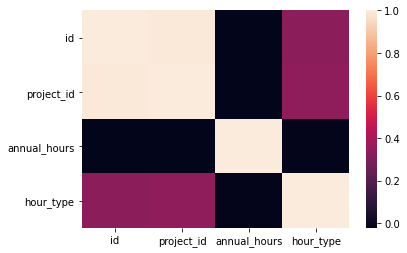

In [ ]:
sns.heatmap(df_operating_schedule.corr())

# **Rate_schedule**

In [ ]:
rate_schedule.shape

(6754, 19)

In [ ]:
rate_schedule.columns

Index(['id', 'created_by_user_id', 'project_id', 'name', 'kwh_cost',
       'created_at', 'updated_at', 'active', 'inactive_at', 'internal_notes',
       'notes', 'uuid', 'copied_from_id', 'kwh_cost_simple', 'kw_demand_cost',
       'demand_utilization', 'rate_escalator', 'rate_customer', 'rate_type'],
      dtype='object')

In [ ]:
print("Removing null values ")
print()
for i in rate_schedule.columns:
    if (rate_schedule[i].isnull().sum()/len(rate_schedule))*100 >= 30:
        print(i,":", rate_schedule[i].isnull().sum()/len(rate_schedule)*100, "%")
        rate_schedule.drop(i, axis=1,inplace=True)

Removing null values 

inactive_at : 98.0900207284572 %
internal_notes : 98.44536570920936 %
notes : 98.9191590168789 %
copied_from_id : 94.21083802191295 %
kwh_cost_simple : 98.8007106899615 %
kw_demand_cost : 98.97838318033759 %
rate_escalator : 97.15724015398283 %


In [ ]:
print("Dropping columns which have mostly zero's ")
print()
for i in rate_schedule.columns:
    if len(rate_schedule[rate_schedule[i]==0])/len(rate_schedule)*100 >=85:
        print(i,":", len(rate_schedule[rate_schedule[i]==0])/len(rate_schedule)*100,"%")
        rate_schedule.drop(i, axis=1,inplace=True)

Dropping columns which have mostly zero's 

rate_customer : 99.54101273319515 %


In [ ]:
rate_schedule.shape

(6754, 11)

In [ ]:
rate_schedule.columns

Index(['id', 'created_by_user_id', 'project_id', 'name', 'kwh_cost',
       'created_at', 'updated_at', 'active', 'uuid', 'demand_utilization',
       'rate_type'],
      dtype='object')

In [ ]:
rate_schedule = rate_schedule.drop(columns=['created_by_user_id', 'created_at', 'updated_at', 'uuid', 'demand_utilization'])

In [ ]:
rate_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6754 entries, 0 to 6753
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          6754 non-null   int64  
 1   project_id  6752 non-null   float64
 2   name        6754 non-null   object 
 3   kwh_cost    6717 non-null   float64
 4   active      6754 non-null   object 
 5   rate_type   6753 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 316.7+ KB


In [ ]:
rate_schedule['active'].value_counts(normalize=True)

t    0.97942
f    0.02058
Name: active, dtype: float64

2% is inactive

In [ ]:
df_rate_schedule = rate_schedule[rate_schedule.active=='t']
df_rate_schedule.shape

(6615, 6)

# **Floor_plans**

In [ ]:
floor_plan.shape

(368, 10)

In [ ]:
floor_plan.columns

Index(['id', 'area_id', 'active', 'height', 'width', 'created_by_user_id',
       'created_at', 'updated_at', 'uuid', 'inactive_at'],
      dtype='object')

In [ ]:
print("Removing null values ")
print()
for i in floor_plan.columns:
    if (floor_plan[i].isnull().sum()/len(floor_plan))*100 >= 30:
        print(i,":", floor_plan[i].isnull().sum()/len(floor_plan)*100, "%")
        floor_plan.drop(i, axis=1,inplace=True)

Removing null values 

inactive_at : 69.02173913043478 %


In [ ]:
print("Dropping columns which have mostly zero's ")
print()
for i in floor_plan.columns:
    if len(floor_plan[floor_plan[i]==0])/len(floor_plan)*100 >=85:
        print(i,":", len(floor_plan[floor_plan[i]==0])/len(floor_plan)*100,"%")
        floor_plan.drop(i, axis=1,inplace=True)

Dropping columns which have mostly zero's 



In [ ]:
floor_plan.shape

(368, 9)

In [ ]:
floor_plan.columns

Index(['id', 'area_id', 'active', 'height', 'width', 'created_by_user_id',
       'created_at', 'updated_at', 'uuid'],
      dtype='object')

In [ ]:
floor_plan = floor_plan.drop(columns=['created_by_user_id', 'created_at', 'updated_at', 'uuid'])

In [ ]:
floor_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       368 non-null    int64  
 1   area_id  368 non-null    int64  
 2   active   368 non-null    object 
 3   height   366 non-null    float64
 4   width    366 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.5+ KB


In [ ]:
floor_plan['active'].value_counts(normalize=True)

t    0.690217
f    0.309783
Name: active, dtype: float64

31% is inactive

In [ ]:
df_floor_plan = floor_plan[floor_plan.active == 't']
df_floor_plan.shape

(254, 5)

# **Areas**

In [ ]:
areas.shape

(166634, 45)

In [ ]:
areas.columns

Index(['id', 'parent_id', 'created_by_user_id', 'name', 'description',
       'operating_schedule_id', 'cooling_id', 'heating_id', 'rate_schedule_id',
       'sqft', 'avg_illuminace', 'lighting_satisfaction', 'ceiling_height',
       'reflectance', 'created_at', 'updated_at', 'active', 'inactive_at',
       'project_id', 'internal_notes', 'notes', 'area_count', 'width',
       'length', 'floor_plan', 'uuid', 'name_with_parents', 'copied_from_id',
       'min_brightness_level', 'existing_controls',
       'bi_level_or_occupancy_sensor', 'code', 'first_illuminance',
       'second_illuminance', 'third_illuminance', 'fourth_illuminance',
       'fifth_illuminance', 'location_id', 'area_type', 'custom_attributes',
       'audit_complete', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44'],
      dtype='object')

In [ ]:
print("Removing null values ")
print()
for i in areas.columns:
    if (areas[i].isnull().sum()/len(areas))*100 >= 30:
        print(i,":", areas[i].isnull().sum()/len(areas)*100, "%")
        areas.drop(i, axis=1,inplace=True)

Removing null values 

parent_id : 48.07062184188101 %
description : 93.6771607235018 %
operating_schedule_id : 83.3833431352545 %
cooling_id : 99.69514024748851 %
heating_id : 99.81456365447627 %
rate_schedule_id : 96.66814695680354 %
sqft : 99.59912142779986 %
avg_illuminace : 94.3678961076371 %
lighting_satisfaction : 99.8169641249685 %
ceiling_height : 99.30986473348776 %
reflectance : 99.97599529507784 %
inactive_at : 97.13203787942437 %
internal_notes : 99.28706026381171 %
notes : 96.42930014282798 %
width : 99.85717200571312 %
length : 99.8757756520278 %
floor_plan : 99.85777212333618 %
copied_from_id : 70.92070045728963 %
min_brightness_level : 78.7702389668375 %
existing_controls : 91.58335033666599 %
bi_level_or_occupancy_sensor : 92.5459390040448 %
first_illuminance : 98.69174358174202 %
second_illuminance : 99.38848014210785 %
third_illuminance : 99.4808982560582 %
fourth_illuminance : 99.56251425279355 %
fifth_illuminance : 99.56611495853187 %
location_id : 87.444939208084

In [ ]:
print("Dropping columns which have mostly zero's ")
print()
for i in areas.columns:
    if len(areas[areas[i]==0])/len(areas)*100 >=85:
        print(i,":", len(areas[areas[i]==0])/len(areas)*100,"%")
        areas.drop(i, axis=1,inplace=True)

Dropping columns which have mostly zero's 



In [ ]:
areas.shape

(166634, 13)

In [ ]:
areas.columns

Index(['id', 'created_by_user_id', 'name', 'created_at', 'updated_at',
       'active', 'project_id', 'area_count', 'uuid', 'name_with_parents',
       'code', 'custom_attributes', 'audit_complete'],
      dtype='object')

In [ ]:
areas = areas.drop(columns=['created_at', 'updated_at', 'area_count', 'uuid', 'custom_attributes', 'audit_complete'])

In [ ]:
areas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166634 entries, 0 to 166633
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  166632 non-null  object 
 1   created_by_user_id  166557 non-null  object 
 2   name                166556 non-null  object 
 3   active              166535 non-null  object 
 4   project_id          166525 non-null  object 
 5   name_with_parents   165791 non-null  object 
 6   code                166520 non-null  float64
dtypes: float64(1), object(6)
memory usage: 8.9+ MB


In [ ]:
areas['active'].value_counts(normalize=True)

t           0.958429
f           0.041499
{}          0.000024
09:05.6     0.000006
57:28.1     0.000006
20:02.2     0.000006
22:51.0     0.000006
54:59.6     0.000006
59:32.5     0.000006
00:38.3     0.000006
'58 HID     0.000006
Name: active, dtype: float64

4% is inactive

In [ ]:
df_areas = areas[areas.active == 't']
df_areas.shape

(159612, 7)

# **Proposal_options**

In [ ]:
proopts.shape

(10007, 9)

In [ ]:
proopts.columns

Index(['id', 'proposal_id', 'option_id', 'created_by_user_id', 'active',
       'inactive_at', 'inactivated_by_user_id', 'created_at', 'updated_at'],
      dtype='object')

In [ ]:
print("Removing null values ")
print()
for i in proopts.columns:
    if (proopts[i].isnull().sum()/len(proopts))*100 >= 30:
        print(i,":", proopts[i].isnull().sum()/len(proopts)*100, "%")
        proopts.drop(i, axis=1,inplace=True)

Removing null values 

inactive_at : 93.31467972419306 %
inactivated_by_user_id : 100.0 %


In [ ]:
print("Dropping columns which have mostly zero's ")
print()
for i in proopts.columns:
    if len(proopts[proopts[i]==0])/len(proopts)*100 >=85:
        print(i,":", len(proopts[proopts[i]==0])/len(proopts)*100,"%")
        proopts.drop(i, axis=1,inplace=True)

Dropping columns which have mostly zero's 



In [ ]:
proopts.columns

Index(['id', 'proposal_id', 'option_id', 'created_by_user_id', 'active',
       'created_at', 'updated_at'],
      dtype='object')

In [ ]:
proopts['active'].value_counts(normalize=True)

t    0.933347
f    0.066653
Name: active, dtype: float64

Approx, 6.7% is inactive

In [ ]:
df_proopts = proopts[proopts.active == 't']
df_proopts.shape

(9340, 7)

# **Solutions**

In [ ]:
solutions.shape

(84227, 22)

In [ ]:
solutions.columns

Index(['id', 'project_id', 'name', 'existing_lighting_id', 'existing_count',
       'use_existing', 'created_at', 'updated_at', 'internal_notes', 'notes',
       'active', 'inactive_at', 'created_by_user_id', 'incentive_type',
       'incentive_amount', 'incentive_maximum', 'incentive_max_type',
       'copied_from_id', 'total_wattage', 'total_lifetime', 'product_count',
       'option_id'],
      dtype='object')

In [ ]:
print("Removing null values ")
print()
for i in solutions.columns:
    if (solutions[i].isnull().sum()/len(solutions))*100 >= 30:
        print(i,":", solutions[i].isnull().sum()/len(solutions)*100, "%")
        solutions.drop(i, axis=1,inplace=True)

Removing null values 

existing_lighting_id : 37.8049794009047 %
use_existing : 99.70318306481295 %
internal_notes : 99.13210728151304 %
notes : 99.3968679876999 %
inactive_at : 84.89676706994194 %
incentive_amount : 55.533261305757065 %
incentive_maximum : 93.13284338751232 %
incentive_max_type : 79.37834661094423 %
copied_from_id : 76.62032364918613 %
total_wattage : 99.01219323969748 %
total_lifetime : 99.46929131988554 %


In [ ]:
print("Dropping columns which have mostly zero's ")
print()
for i in solutions.columns:
    if len(solutions[solutions[i]==0])/len(solutions)*100 >=85:
        print(i,":", len(solutions[solutions[i]==0])/len(solutions)*100,"%")
        solutions.drop(i, axis=1,inplace=True)

Dropping columns which have mostly zero's 



In [ ]:
solutions.shape

(84227, 11)

In [ ]:
solutions.columns

Index(['id', 'project_id', 'name', 'existing_count', 'created_at',
       'updated_at', 'active', 'created_by_user_id', 'incentive_type',
       'product_count', 'option_id'],
      dtype='object')

In [ ]:
soutions = solutions.drop(columns=['created_by_user_id', 'incentive_type'])

In [ ]:
solutions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84227 entries, 0 to 84226
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  84227 non-null  int64  
 1   project_id          83288 non-null  float64
 2   name                84224 non-null  object 
 3   existing_count      84227 non-null  int64  
 4   created_at          84227 non-null  object 
 5   updated_at          84227 non-null  object 
 6   active              84227 non-null  object 
 7   created_by_user_id  84227 non-null  int64  
 8   incentive_type      84219 non-null  float64
 9   product_count       84227 non-null  int64  
 10  option_id           82461 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 7.1+ MB


In [ ]:
solutions['active'].value_counts(normalize=True)

t    0.789652
f    0.210348
Name: active, dtype: float64

21% is inactive

In [ ]:
df_solutions = solutions[solutions.active == 't']
df_solutions.shape

(66510, 11)

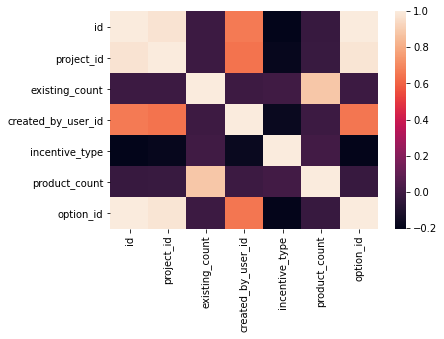

In [ ]:
sns.heatmap(df_solutions.corr())

# **Option_calc_lightings**

In [ ]:
option_calc_lighting.shape

(88076, 9)

In [ ]:
option_calc_lighting.columns

Index(['id', 'option_calculation_id', 'existing_lighting_id', 'solution_id',
       'use', 'started_at', 'finished_at', 'existing_quantity',
       'proposed_quantity'],
      dtype='object')

In [ ]:
print("Removing null values ")
print()
for i in areas.columns:
    if (areas[i].isnull().sum()/len(areas))*100 >= 30:
        print(i,":", areas[i].isnull().sum()/len(areas)*100, "%")
        areas.drop(i, axis=1,inplace=True)

Removing null values 



In [ ]:
print("Dropping columns which have mostly zero's ")
print()
for i in areas.columns:
    if len(areas[areas[i]==0])/len(areas)*100 >=85:
        print(i,":", len(areas[areas[i]==0])/len(areas)*100,"%")
        areas.drop(i, axis=1,inplace=True)

Dropping columns which have mostly zero's 



In [ ]:
option_calc_lighting = option_calc_lighting[['id', 'option_calculation_id', 'existing_lighting_id', 
                                             'solution_id', 'use', 'existing_quantity', 'proposed_quantity']]

In [ ]:
option_calc_lighting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88076 entries, 0 to 88075
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     88076 non-null  int64  
 1   option_calculation_id  88076 non-null  int64  
 2   existing_lighting_id   88076 non-null  int64  
 3   solution_id            41207 non-null  float64
 4   use                    88076 non-null  object 
 5   existing_quantity      88076 non-null  int64  
 6   proposed_quantity      88076 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 4.7+ MB


In [204]:
option_calc_lighting['ratio'] = option_calc_lighting['proposed_quantity']/option_calc_lighting['existing_quantity']

In [205]:
option_calc_lighting.head()

,id,option_calculation_id,existing_lighting_id,solution_id,use,existing_quantity,proposed_quantity,ratio
0,41272,5545,39580,NaN,t,0,0,NaN
1,4,1,15701,NaN,t,188,0,0.0
2,5,1,15700,17556.0,t,2,2,1.0
3,32,1,15673,17403.0,t,14,14,1.0
4,34,1,15671,NaN,t,66,0,0.0


In [209]:
option_calc_lighting['ratio'].value_counts(normalize=True)

1.000000     0.516047
0.000000     0.400140
2.000000     0.045486
4.000000     0.017530
3.000000     0.008160
               ...   
1.022396     0.000019
0.991103     0.000019
27.000000    0.000019
0.642857     0.000019
0.529412     0.000019
Name: ratio, Length: 200, dtype: float64

In [208]:
option_calc_lighting.isnull().sum()

id                           0
option_calculation_id        0
existing_lighting_id         0
solution_id              46869
use                          0
existing_quantity            0
proposed_quantity            0
ratio                    35137
dtype: int64

In [ ]:
option_calc_lighting['use'].value_counts(normalize=True)

t    0.854115
f    0.145885
Name: use, dtype: float64

14.5% is not in use

In [ ]:
df_option_calc_lighting = option_calc_lighting[option_calc_lighting.use == 't']
df_option_calc_lighting.shape

(75227, 7)

# **Option_calc_fixtures**

In [ ]:
option_calc_fixtures.shape

(409780, 64)

In [ ]:
option_calc_fixtures.columns

Index(['id', 'option_calculation_id', 'existing_fixture_id', 'started_at',
       'finished_at', 'product_id', 'product_type', 'operating_schedule_id',
       'rate_schedule_id', 'heating_id', 'cooling_id', 'replacement_count',
       'markup', 'markup_type', 'incentive_savings', 'fixture_item_cost',
       'fixture_item_cost_no_markup', 'fixture_labor_cost',
       'fixture_shipping_cost', 'fixture_misc_cost', 'fixture_tax_cost',
       'fixture_total_cost', 'watts_per_product', 'electrical_cost',
       'maintenance_cost', 'heating_cost', 'cooling_cost',
       'total_cost_per_year', 'total_savings', 'created_at', 'updated_at',
       'item_watt_hours_consumed', 'replacement_fixture_cost',
       'replacement_fixture_cost_no_markup', 'replacement_labor_cost',
       'replacement_shipping_cost', 'replacement_misc_cost',
       'replacement_tax_cost', 'total_replacement_cost',
       'total_savings_per_lamp_life', 'life_years', 'area_full_name',
       'option_calc_fixture_id', 'soluti

In [ ]:
print("Removing null values ")
print()
for i in areas.columns:
    if (areas[i].isnull().sum()/len(areas))*100 >= 30:
        print(i,":", areas[i].isnull().sum()/len(areas)*100, "%")
        areas.drop(i, axis=1,inplace=True)

Removing null values 



In [ ]:
print("Dropping columns which have mostly zero's ")
print()
for i in areas.columns:
    if len(areas[areas[i]==0])/len(areas)*100 >=85:
        print(i,":", len(areas[areas[i]==0])/len(areas)*100,"%")
        areas.drop(i, axis=1,inplace=True)

Dropping columns which have mostly zero's 



In [ ]:
option_calc_fixtures = option_calc_fixtures[['id', 'option_calculation_id', 'existing_fixture_id',
                                             'product_id', 'operating_schedule_id', 'rate_schedule_id', 'heating_id', 
                                             'cooling_id', 'replacement_count', 'watts_per_product',
                                             'item_watt_hours_consumed', 'life_years', 'option_calc_fixture_id', 'solution_id',
                                             'item_watts', 'simple_payback', 'product_name', 'existing_product_name', 'use',
                                             'active', 'exception']]

In [ ]:
option_calc_fixtures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409780 entries, 0 to 409779
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        409780 non-null  int64  
 1   option_calculation_id     269353 non-null  float64
 2   existing_fixture_id       409780 non-null  int64  
 3   product_id                294354 non-null  float64
 4   operating_schedule_id     385583 non-null  float64
 5   rate_schedule_id          366052 non-null  float64
 6   heating_id                12104 non-null   float64
 7   cooling_id                37676 non-null   float64
 8   replacement_count         409780 non-null  int64  
 9   watts_per_product         409780 non-null  float64
 10  item_watt_hours_consumed  409780 non-null  float64
 11  life_years                409780 non-null  float64
 12  option_calc_fixture_id    269335 non-null  object 
 13  solution_id               165356 non-null  o

In [ ]:
option_calc_fixtures['active'].value_counts(normalize=True)

t                             0.980441
f                             0.019554
2021-03-02 22:37:57.180609    0.000005
Name: active, dtype: float64

2% is inactive

In [ ]:
option_calc_fixtures['use'].value_counts(normalize=True)

t       0.951940
f       0.047702
0       0.000356
1.06    0.000002
Name: use, dtype: float64

Almost, 5% is not in use

In [ ]:
df_option_calc_fixtures = option_calc_fixtures[option_calc_fixtures.active == 't']
df_option_calc_fixtures = option_calc_fixtures[option_calc_fixtures.use == 't']
df_option_calc_fixtures.shape

(390083, 21)

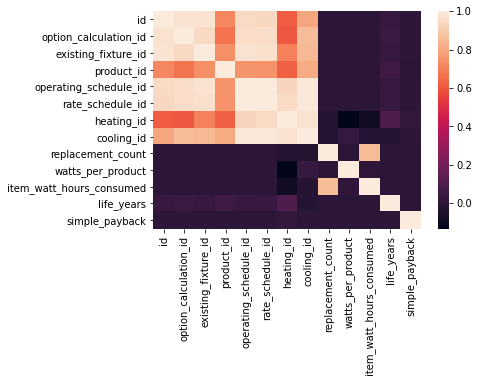

In [ ]:
sns.heatmap(df_option_calc_fixtures.corr())

# **Projects**

In [ ]:
projects.shape

(11800, 54)

In [ ]:
projects.columns

Index(['id', 'company_id', 'name', 'created_by_user_id', 'created_at',
       'updated_at', 'company_project_status_id', 'client_id', 'contact_id',
       'active', 'inactive_at', 'utility_id', 'utility_rate_plan',
       'facility_type_id', 'rate_schedule_id', 'operating_schedule_id',
       'cooling_id', 'heating_id', 'internal_notes', 'notes',
       'prepared_for_user_id', 'prepared_by_user_id', 'maintenance_labor_rate',
       'markup', 'apply_tax_on', 'tax_type', 'tax_rate_source', 'tax_rate',
       'encentiv_id', 'financing_debt_percentage', 'financing_interest_rate',
       'financing_loan_months', 'incentive_max_type', 'incentive_max',
       'all_company_access', 'client_logo', 'markup_type', 'test',
       'probability', 'expected_close_date', 'shipping_address_location',
       'rebate_bus_id', 'highest_value_option_id', 'audit_status', 'uuid',
       'funding_status', 'enable_sync', 'finance_discount_rate',
       'finance_term', 'copied_from_id', 'copy_status', 'tax_exem

In [ ]:
df_projects = projects[['id', 'company_id', 'name', 'company_project_status_id', 'active',
       'tax_rate_source', 'uuid', 'tax_exempt', 'facility_type_id']]

In [ ]:
print("Removing null values ")
print()
for i in projects.columns:
    if (projects[i].isnull().sum()/len(projects))*100 >= 30:
        print(i,":", projects[i].isnull().sum()/len(projects)*100, "%")
        projects.drop(i, axis=1,inplace=True)

Removing null values 

client_id : 99.88135593220339 %
contact_id : 50.72033898305085 %
inactive_at : 87.80508474576271 %
utility_id : 76.51694915254237 %
utility_rate_plan : 99.9322033898305 %
facility_type_id : 71.33050847457628 %
rate_schedule_id : 47.67796610169491 %
operating_schedule_id : 42.38135593220339 %
cooling_id : 96.70338983050848 %
heating_id : 99.02542372881355 %
internal_notes : 98.84745762711864 %
notes : 99.3135593220339 %
prepared_for_user_id : 99.96610169491525 %
prepared_by_user_id : 54.355932203389834 %
maintenance_labor_rate : 85.59322033898306 %
markup : 68.04237288135593 %
apply_tax_on : 70.05932203389831 %
tax_type : 73.7457627118644 %
tax_rate : 73.19491525423729 %
encentiv_id : 98.73728813559322 %
financing_debt_percentage : 99.67796610169492 %
financing_interest_rate : 99.63559322033898 %
financing_loan_months : 99.66101694915255 %
incentive_max_type : 95.19491525423729 %
incentive_max : 97.91525423728814 %
client_logo : 70.44915254237289 %
markup_type : 6

In [ ]:
print("Dropping columns which have mostly zero's ")
print()
for i in projects.columns:
    if len(projects[projects[i]==0])/len(projects)*100 >=85:
        print(i,":", len(projects[projects[i]==0])/len(projects)*100,"%")
        projects.drop(i, axis=1,inplace=True)

Dropping columns which have mostly zero's 

copy_status : 99.97457627118645 %


In [ ]:
projects = projects.drop(columns=['created_by_user_id', 'created_at', 'updated_at', 'all_company_access', 'enable_sync',
                                  'finance_discount_rate', 'finance_term', 'custom_attributes', 'measure_types'])

In [ ]:
df_projects.shape

(11800, 9)

In [ ]:
df_projects.columns

Index(['id', 'company_id', 'name', 'company_project_status_id', 'active',
       'tax_rate_source', 'uuid', 'tax_exempt', 'facility_type_id'],
      dtype='object')

In [ ]:
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11800 entries, 0 to 11799
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         11800 non-null  int64  
 1   company_id                 11797 non-null  float64
 2   name                       11800 non-null  object 
 3   company_project_status_id  11799 non-null  float64
 4   active                     11799 non-null  object 
 5   tax_rate_source            11670 non-null  float64
 6   uuid                       11800 non-null  object 
 7   tax_exempt                 11799 non-null  object 
 8   facility_type_id           3383 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 829.8+ KB


In [ ]:
df_projects['active'].value_counts(normalize=True)

t    0.877278
f    0.122722
Name: active, dtype: float64

12.3% is inactive

In [ ]:
df_projectst = df_projects[df_projects.active == 't']
df_projectst.shape

(10351, 9)

Final Shapes

In [ ]:
df_exist_light.shape

(75031, 7)

In [ ]:
df_exist_fixture.shape

(176425, 5)

In [ ]:
df_areas.shape

(159612, 7)

In [ ]:
df_floor_plan.shape

(254, 5)

In [ ]:
df_operating_schedule.shape

(13239, 7)

In [ ]:
df_rate_schedule.shape

(6615, 6)

In [ ]:
df_proopts.shape

(9340, 7)

In [ ]:
df_solutions.shape

(66510, 11)

In [ ]:
df_option_calc_lighting.shape

(75227, 7)

In [ ]:
df_option_calc_fixtures.shape

(390083, 21)

In [ ]:
df_projectst.shape

(10351, 9)